In [1]:
!pip install pandas
import pandas as pd

In [6]:

!conda install -c conda-forge fbprophet --yes




Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [24]:
data = pd.read_csv("NFLX (4).csv")
data2 = pd.read_csv("NFLX (3).csv")

from fbprophet.plot import plot_plotly, plot_components_plotly

data=data.rename(columns={'Date':'ds', 'Close':'y'})
data2=data2.rename(columns={'Date':'ds', 'Close':'y'})

In [25]:
m3 = Prophet(yearly_seasonality = True)

m3.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future = m3.make_future_dataframe(periods = 228)
forecast = m3.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
432,2020-08-24,301.603191,271.054322,332.365611
433,2020-08-25,301.710366,270.912858,333.006186
434,2020-08-26,301.824504,274.409572,333.412649
435,2020-08-27,301.940686,271.853352,334.159085
436,2020-08-28,302.054001,270.239963,332.847228


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0, 0.5, 'Close of stock')

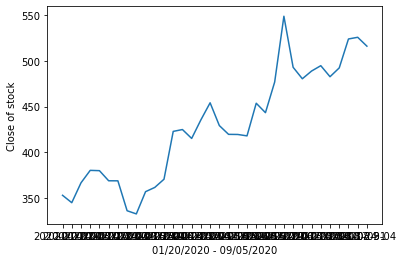

In [37]:
import matplotlib.pyplot as plt

plt.plot(data2.ds,data2.y)
plt.xlabel('01/20/2020 - 09/05/2020')
plt.ylabel('Close of stock')



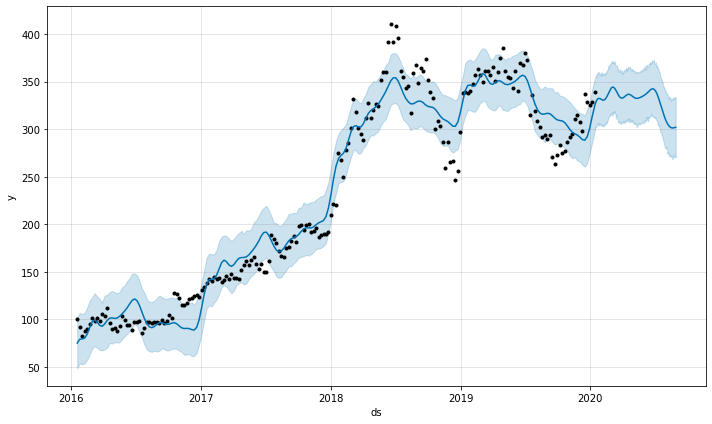

In [38]:
fig1 = m3.plot(forecast)


In [39]:
data2.tail()


,ds,Open,High,Low,y,Adj Close,Volume
29,2020-08-10,493.350006,497.459991,466.549988,482.679993,482.679993,23414000
30,2020-08-17,484.190002,498.940002,479.100006,492.309998,492.309998,18139000
31,2020-08-24,495.440002,549.039978,483.160004,523.890015,523.890015,44344000
32,2020-08-31,521.159973,557.390015,517.580017,525.750000,525.750000,29462500
33,2020-09-04,520.179993,527.359985,485.980011,516.049988,516.049988,8270118


In [40]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
432,2020-08-24,313.433335,271.054322,332.365611,300.295676,328.175679,-11.830144,-11.830144,-11.830144,-11.830144,-11.830144,-11.830144,0.0,0.0,0.0,301.603191
433,2020-08-25,313.393983,270.912858,333.006186,300.230973,328.201124,-11.683617,-11.683617,-11.683617,-11.683617,-11.683617,-11.683617,0.0,0.0,0.0,301.710366
434,2020-08-26,313.354631,274.409572,333.412649,300.166271,328.267570,-11.530127,-11.530127,-11.530127,-11.530127,-11.530127,-11.530127,0.0,0.0,0.0,301.824504
435,2020-08-27,313.315279,271.853352,334.159085,300.080965,328.380909,-11.374593,-11.374593,-11.374593,-11.374593,-11.374593,-11.374593,0.0,0.0,0.0,301.940686
436,2020-08-28,313.275927,270.239963,332.847228,299.942300,328.484897,-11.221927,-11.221927,-11.221927,-11.221927,-11.221927,-11.221927,0.0,0.0,0.0,302.054001


In [1]:
netflix_impact = (516.049988 - 302.054001)/302.054001 * 100
print("Netflix's stocks have been impacted by Covid-19(from the date when the first case was reported in the USA) against the normal flow by\n", netflix_impact, "% as of 09/05/2020")

Netflix's stocks have been impacted by Covid-19(from the date when the first case was reported in the USA) against the normal flow by
 70.84693011565172 % as of 09/05/2020
